## Effect of k on KNN accuracy
this notebook examines the effect of selecting a k neighbour in ML

### Importing packages

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Iris dataset from sklearn

In [54]:
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()

In [56]:
 iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Splitting dataset in training and testing sets

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
Xtrain, Xtest , ytrain, ytest = train_test_split(iris.data, iris.target, test_size= 0.3, random_state=101, stratify=iris.target)
#stratify option allows for splitting dataset equally into training and testing testing sets as in this prevents splitting
#bias

In [59]:
np.bincount(iris.target)
# this shows that the dataset has 50 items(entries) each of a particular type of flower

array([50, 50, 50], dtype=int64)

In [60]:
np.bincount(ytrain)

array([35, 35, 35], dtype=int64)

### Scaling dataset to improve the efficiency of the knn classiffier

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(Xtrain)

StandardScaler()

In [64]:
scaled_Xtrain = scaler.transform(Xtrain)
scaled_Xtest = scaler.transform(Xtest)

### Importing KNN Classiffier

In [65]:
from sklearn.neighbors import KNeighborsClassifier as KNN 

### Import Metrics

In [66]:
from sklearn.metrics import accuracy_score

#### Evaluating k values

In [70]:
accuracy = []

for k in range(1,40):
    knn = KNN(n_neighbors = k)
    knn.fit(scaled_Xtrain,ytrain)
    pred = knn.predict(scaled_Xtest)
    score = accuracy_score(ytest,pred)
    accuracy.append(score)

C:\Users\John\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\John\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

### Plotting

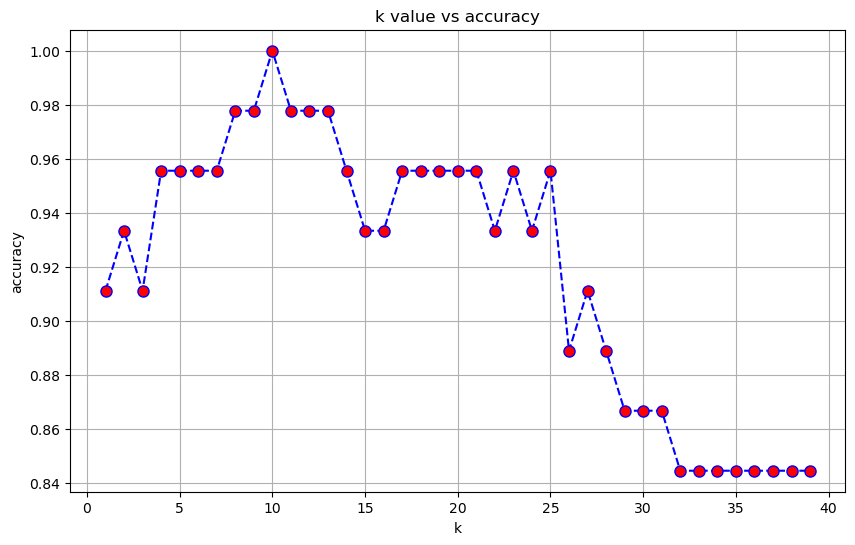

In [75]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.title('k value vs accuracy')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.grid(True)
plt.plot(range(1,40), accuracy , '--bo', markerfacecolor='r', markersize = 8)
plt.show()

In [74]:
accuracy[:11]

[0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 0.9777777777777777]

It can be seen from the plot that a k value of 9,10,11 will be good for training the model